In [ ]:
import pandas as pd


In [72]:
file = pd.read_csv("/content/Womens Clothing Review.csv")
file.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [73]:
#Get Review and Rating from the original dataset
df = file[["Review Text", "Rating"]]
df.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  object
 1   Rating       23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [75]:
df.dropna(subset=['Review Text'], inplace=True)

<ipython-input-75-1d1fe27478c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Review Text'], inplace=True)


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  object
 1   Rating       22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [77]:
import nltk
# Set of punctuation signs to remove
from string import punctuation

In [78]:
import re

def lowerText(text):
    return text.lower()

def remove_punctuation_InText(text):
    return text.translate(str.maketrans('','', punctuation))

# Removing all words with digits and standalone digits
def remove_digits_InText(text):
    return re.sub(r'\d+', '', text)

def remove_emoji_InText(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable_InText(text):
    text = text.encode("ascii", "ignore")
    return text.decode()

# One function to clean it all
def clean_Review(text):
    text = lowerText(text)
    text = remove_punctuation_InText(text)
    text = remove_digits_InText(text)
    text = remove_emoji_InText(text)
    text = remove_non_printable_InText(text)
    return text

In [79]:
df['Review']=df['Review Text'].apply(clean_Review)
df.head()

<ipython-input-79-adb973c28cad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review']=df['Review Text'].apply(clean_Review)


,Review Text,Rating,Review
0,Absolutely wonderful - silky and sexy and comf...,4,absolutely wonderful silky and sexy and comfo...
1,Love this dress! it's sooo pretty. i happene...,5,love this dress its sooo pretty i happened t...
2,I had such high hopes for this dress and reall...,3,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,5,this shirt is very flattering to all due to th...


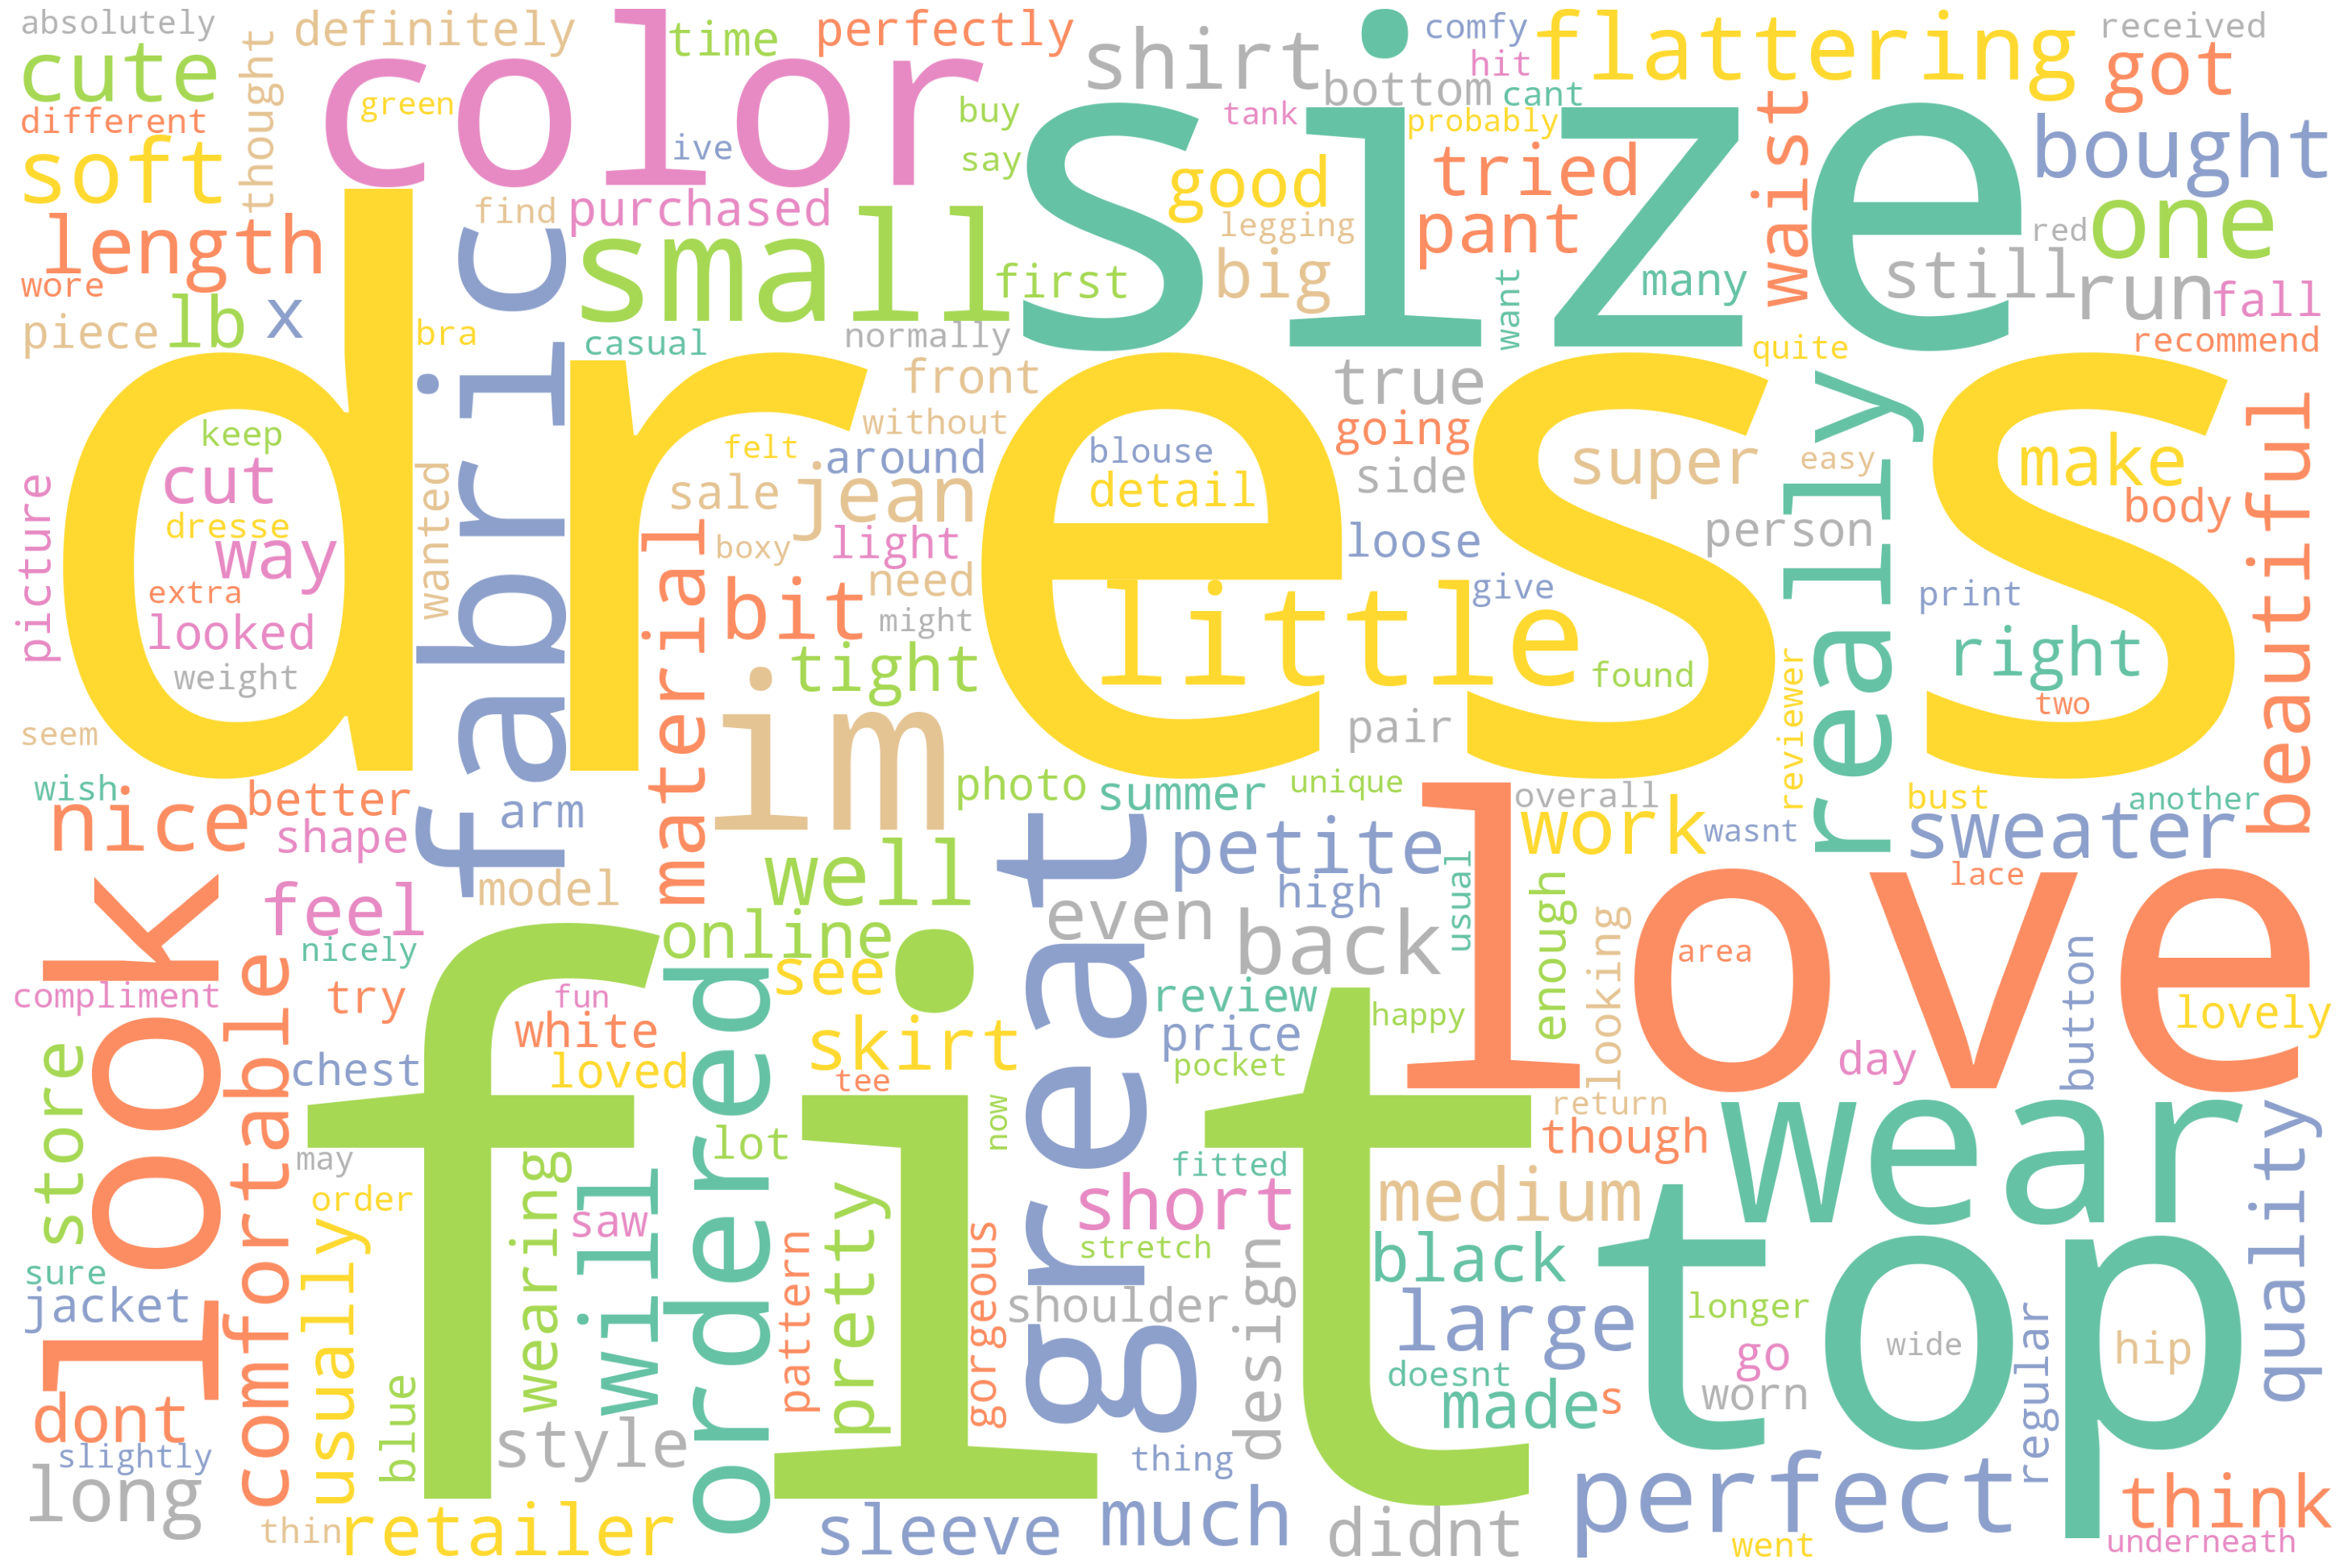

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(40,25))
text = df.Review.values
cloud=WordCloud(background_color='rgba(255, 255, 255, 0)',colormap="Set2",collocations=False,width=3000,height=2000, min_font_size=10).generate(" ".join(text))

plt.axis('off')
plt.imshow(cloud)

In [84]:
import numpy as np
from PIL import Image
mask = np.array(Image.open("/content/user.png"))

In [82]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

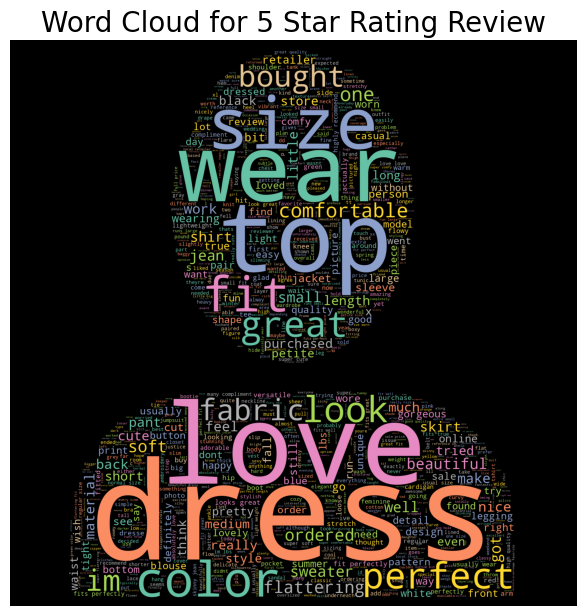

In [113]:
#Add more words to ignore
stopwords.update(["give","normally","cant","keep","seem","may","though","saw","lb","made","doesnt","enough","will","might","felt","like"])
plt.figure(figsize=(40,25))
#Word Cloud By Review Rating
subset1 = df[df['Rating']==5]
text = subset1.Review.values
cloud1=WordCloud(mask=mask,background_color='black',colormap="Set2", max_words=1000,min_font_size=4,collocations=True,stopwords=stopwords,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 1)
plt.axis('off')
plt.title("Word Cloud for 5 Star Rating Review",fontsize=20)
plt.imshow(cloud1)


In [118]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

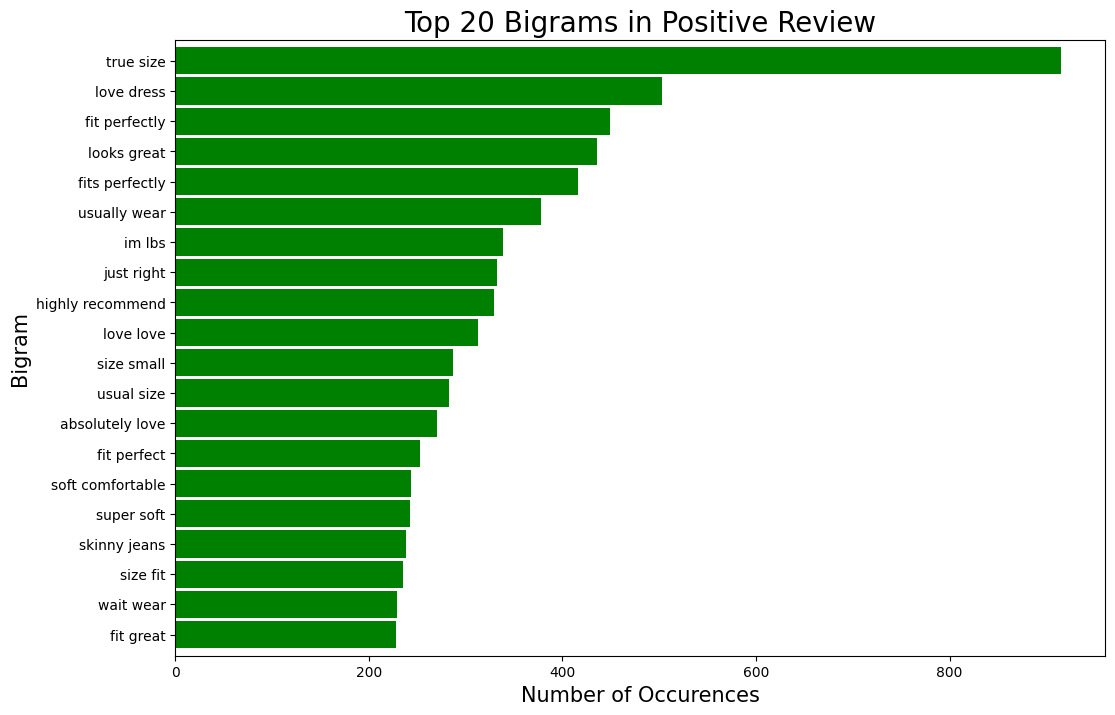

In [119]:
pos_bigrams = get_top_n_gram(df[df['Rating']==5].Review,(2,2),20)

df1 = pd.DataFrame(pos_bigrams, columns = ['Text' , 'Count'])
df1.groupby('Text').sum()['Count'].sort_values(ascending=True).plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title('Top 20 Bigrams in Positive Review', fontsize=20)
plt.ylabel("Bigram", fontsize=15)
plt.xlabel("Number of Occurences", fontsize=15)
plt.show()




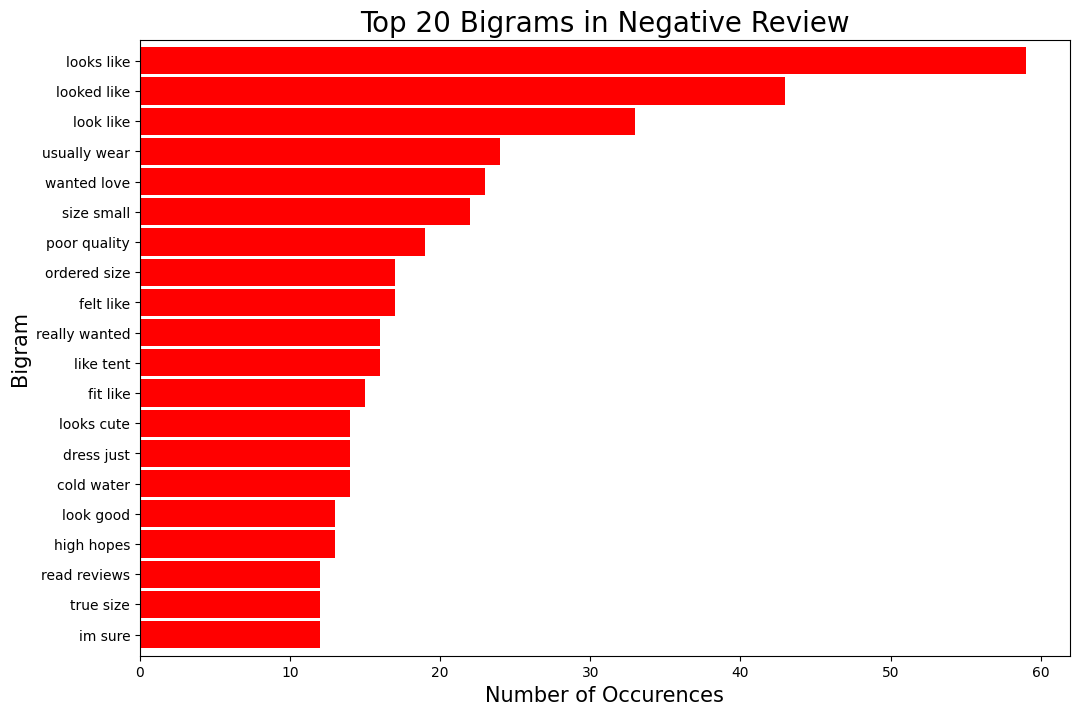

In [115]:
neg_bigrams = get_top_n_gram(df[df['Rating']==1].Review,(2,2),20)


df2 = pd.DataFrame(neg_bigrams, columns = ['Text' , 'Count'])
df2.groupby('Text').sum()['Count'].sort_values(ascending=True).plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('Top 20 Bigrams in Negative Review', fontsize=20)
plt.ylabel("Bigram", fontsize=15)
plt.xlabel("Number of Occurences", fontsize=15)
plt.show()

In [124]:
from textblob import TextBlob

#Categorize Polarity into Positive, Neutral or Negative
labels=["Positive","Neutral","Negative"]

#Initialize count array
values=[0,0,0]

#Categorize each review
for review in df['Review'].values:
    sentiment=TextBlob(review)

    #Custom formula to convert polarity
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity=round((sentiment.polarity+1)*3)%3

    #add the summary array
    values[polarity]=values[polarity]+1

print("Final summarized counts :",values)

Final summarized counts : [7150, 13992, 1499]


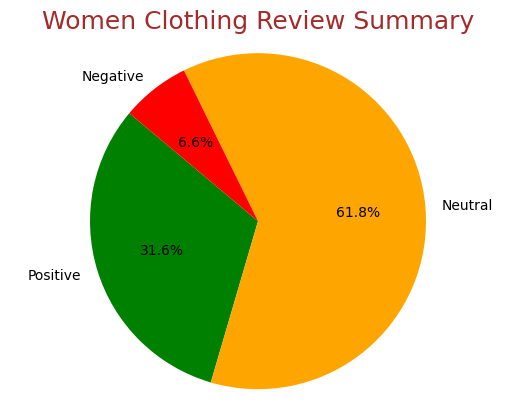

In [129]:
#Plot a pie chart
colors=["Green","Orange","Red"]
plt.pie(values,labels=labels,colors=colors, \
        autopct='%1.1f%%',shadow=False,startangle=140)
plt.axis('equal')
plt.title('Women Clothing Review Summary',fontsize=18, c='Brown')
plt.show()